In [ ]:
TRAIN_PATH = "../../dataset/rgb/train/"
TEST_PATH = "../../dataset/rgb/train/"

In [2]:
import torch
torch.__version__

'1.7.0'

In [3]:
from torchvision import transforms as T

In [4]:
transform = T.Compose([
    T.ToTensor()
])

In [5]:
from torchvision.datasets import ImageFolder

In [6]:
train_dataset = ImageFolder(root=TRAIN_PATH, transform=transform)
train_dataset

Dataset ImageFolder
    Number of datapoints: 8000
    Root location: ../../dataset/rgb/train/
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [7]:
val_dataset = ImageFolder(root=TRAIN_PATH, transform=transform)
val_dataset

Dataset ImageFolder
    Number of datapoints: 8000
    Root location: ../../dataset/rgb/train/
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [8]:
test_dataset = ImageFolder(root=TEST_PATH, transform=transform)
test_dataset

Dataset ImageFolder
    Number of datapoints: 8000
    Root location: ../../dataset/rgb/train/
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [9]:
import numpy as np

In [10]:
val_size = .2

train_samples = len(train_dataset)
train_indices = list(range(train_samples))

split_value = int(np.floor(val_size * train_samples))
np.random.shuffle(train_indices)

In [11]:
from torch.utils.data.sampler import SubsetRandomSampler

In [12]:
train_idx, val_idx = train_indices[split_value:], train_indices[:split_value]

train_sampler = SubsetRandomSampler(train_idx)
val_sampler = SubsetRandomSampler(val_idx)

In [13]:
from torch.utils.data import DataLoader

In [14]:
BATCH_SIZE = 32

In [15]:
train_loader = DataLoader(train_dataset,
                          batch_size=BATCH_SIZE,
                          sampler=train_sampler)

In [16]:
val_loader = DataLoader(val_dataset,
                        batch_size=BATCH_SIZE,
                        sampler=val_sampler)

In [17]:
test_loader = DataLoader(test_dataset,
                         batch_size=BATCH_SIZE)

In [18]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [19]:
images, labels = next(iter(train_loader))
image, label = images[0], labels[0].item()
image.shape # [channels, height, width]

torch.Size([3, 28, 28])

In [20]:
image = np.transpose(image, (1, 2, 0))
image.shape # [height, width, channels]

torch.Size([28, 28, 3])

In [21]:
ID2LABEL = {
    0: 'bart_simpson',
    1: 'charles_montgomery_burns',
    2: 'homer_simpson',
    3: 'krusty_the_clown',
    4: 'lisa_simpson',
    5: 'marge_simpson',
    6: 'milhouse_van_houten',
    7: 'moe_szyslak',
    8: 'ned_flanders',
    9: 'principal_skinner'
}

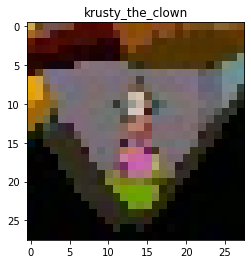

In [22]:
imshow(image)
plt.title(ID2LABEL[label]);